# Hospital Data Analysis Project

## Introduction

In this project, we will analyze a hospital database containing patient encounter data, demographic information, and associated procedures. The primary objective is to extract valuable insights that can inform hospital operations, improve patient outcomes, and enhance healthcare delivery.

To guide our analysis, we will focus on the following key questions:
1. What are the most common procedures performed in the hospital?
2. What percentage of encounters are related to specific conditions or diagnoses?
3. Are there specific procedures or encounter types that consistently exceed their expected costs?
4. What is the relationship between the base encounter cost and the total claim cost?
 
We will extract data related to each question using MySQL Workbench, then load the corresponding result sets into dataframes. (SQL script is in the repo)


In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

## Question 1: Most Common Procedures

In [2]:
#Loading result set into pandas DataFrame: 
df_procedures=pd.read_csv('question 1.csv')
df_procedures.head(10)

,Description,ProcedureCount
0,Assessment of health and social care needs (pr...,4596
1,Hospice care (regime/therapy),4098
2,Depression screening (procedure),3614
3,Depression screening using Patient Health Ques...,3614
4,Assessment of substance use (procedure),2906
5,Renal dialysis (procedure),2746
6,Assessment using Morse Fall Scale (procedure),2422
7,Assessment of anxiety (procedure),2288
8,Medication Reconciliation (procedure),2284
9,Screening for drug abuse (procedure),1484


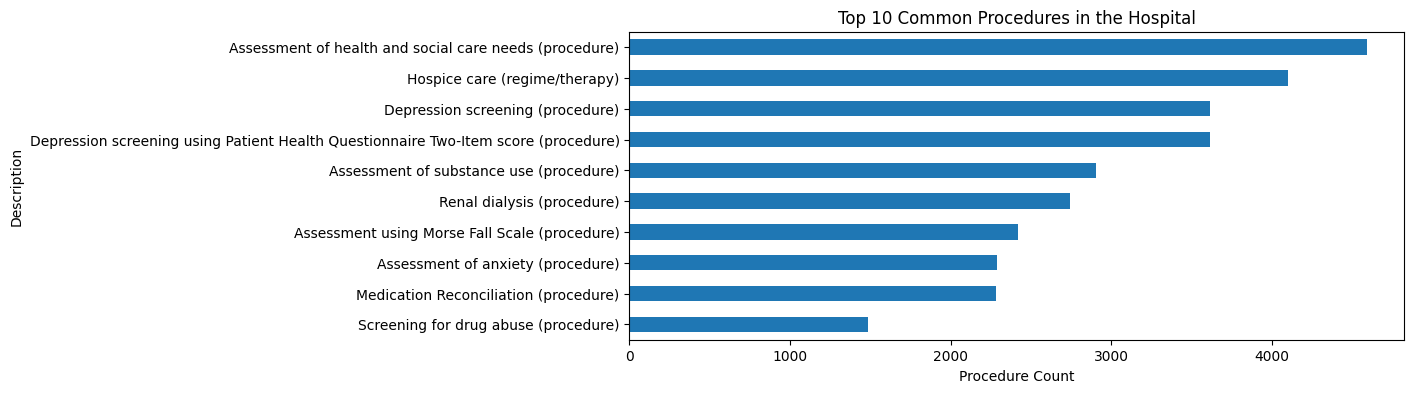

In [3]:
# Plotting the top 10 Most Common Procedures
plt.figure(figsize=(10, 4))

# Plotting
df_procedures.head(10).set_index('Description')['ProcedureCount'].plot(kind='barh')
plt.xlabel('Procedure Count')
plt.title('Top 10 Common Procedures in the Hospital')
plt.gca().invert_yaxis() #to show highest to lowest
plt.show()

Assessment of Health and Social Care Needs leads the top 10,which highlights the importance of understanding patient needs first and foremost. Hospice Care and Depression Screening also stand out, showing the hospital's focus on mental health and compassionate end-of-life care. Other notable procedures like Renal Dialysis and Substance Use Assessments show a commitment to managing chronic conditions and promoting overall well-being.

## Question 2: Percentage of encounters related to specific conditions:

While extracting the data,we've replaced all null values from the 'REASONDESCRIPTION' column - which shows condition related to the encounter-  with 'Unknown' value for clearer analysis.

In [4]:
#Loading the query result set into a dataframe
df_percentages=pd.read_csv('question 2.csv')
df_percentages

,ReasonDescription,EncounterCount,Percentage
0,Unknown,19541,70.06203
1,Chronic congestive heart failure (disorder),1738,6.23140
2,Hyperlipidemia,1565,5.61113
3,Normal pregnancy,1341,4.80800
4,Viral sinusitis (disorder),732,2.62450
...,...,...,...
69,Rupture of patellar tendon,2,0.00717
70,Acute Cholecystitis,2,0.00717
71,Fracture of vertebral column without spinal co...,2,0.00717
72,Small cell carcinoma of lung (disorder),1,0.00359


The significant percentage of encounters classified as "Unknown" (70%) highlights a crucial gap in data management. This lack of information can skew results and hinder accurate assessments of patient conditions and outcomes,and to adjust this using data wrangling techniques (such as imputing) can introduce bias and distort the true picture of patient conditions.To address this, it's essential to investigate the reasons behind these missing data points and improve data collection processes. By doing so, the hospital can enhance the reliability of its analyses and better understand patient needs.

## Question 3: Are there specific procedures or encounter types that consistently exceed their expected costs?

In [5]:
df_cost=pd.read_csv('question 3.csv')
df_cost

,EncounterClass,EncounterCount,TotalClaimCost,TotalBaseCost
0,ambulatory,8941,35863225.84,904968.23
1,urgentcare,1299,23011863.10,185211.42
2,outpatient,4982,13979816.96,546600.43
3,emergency,949,10550223.47,136619.90
4,inpatient,1043,8799778.82,115688.11
5,wellness,1871,8226200.53,255952.80


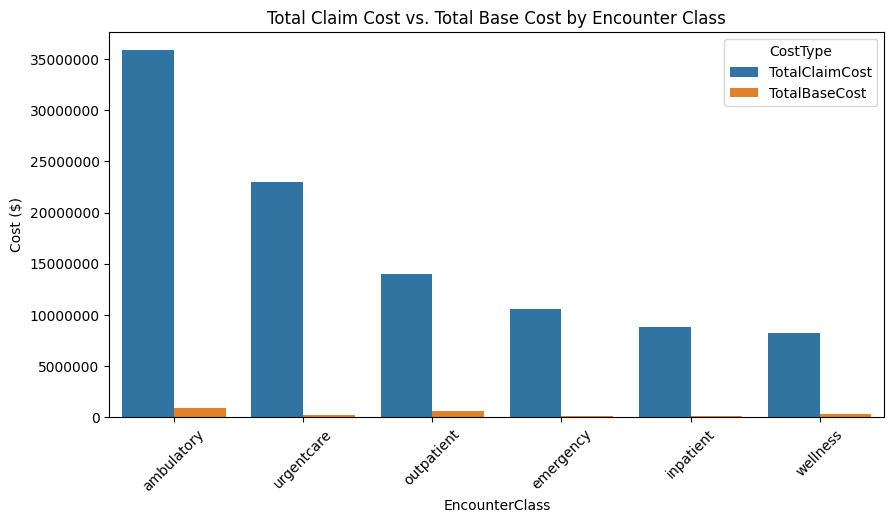

In [6]:
# Melting the DataFrame to long format for Seaborn
df_melted = df_cost.melt(id_vars='EncounterClass', value_vars=['TotalClaimCost', 'TotalBaseCost'],var_name='CostType', value_name='Cost')

#Plotting
plt.figure(figsize=(10, 5))
sns.barplot(data=df_melted, x='EncounterClass', y='Cost', hue='CostType')
plt.ylabel('Cost ($)')
plt.title('Total Claim Cost vs. Total Base Cost by Encounter Class')
plt.xticks(rotation=45)

plt.ylabel('Cost ($)')
plt.ticklabel_format(style='plain', axis='y') # Setting y-axis format to show the amounts

plt.show()


Ambulatory encounters have the highest volume but a low base cost, suggesting they involve less intensive care. In contrast, urgent care has substantial markups, indicating higher complexity or treatment costs. Outpatient services also generate significant revenue, highlighting their role in the hospital’s finances. Emergency encounters reflect high costs due to their urgent nature, while inpatient costs may suggest efficiency. Notably, wellness encounters, crucial for preventive care, carry significant expenses, emphasizing the importance of managing costs in this area.

## Question 4: What is the relationship between the base encounter cost and the total claim cost?

Using the result set from the query for this question,we will apply linear regression to examine the relationship between the two variables:

In [7]:
#importing necessary library and implementing model
from sklearn.linear_model import LinearRegression
df_costcorr=pd.read_csv('question 4.csv')

x=df_costcorr[['Base_Encounter_Cost']]  
y=df_costcorr['Total_Claim_Cost']        
lr=LinearRegression()
lr.fit(x, y)
y_hat=lr.predict(x)

print(lr.coef_)
print(lr.intercept_)

[41.93534709]
-1232.4341404837542


Coefficient (41.94): For every dollar increase in the base encounter cost, the total claim cost increases by approximately $41.94. This indicates a strong positive relationship between the two costs.

Intercept (-1232.43): This value suggests that when the base encounter cost is zero, the model predicts a total claim cost of -$1232.43. This might not have practical significance as base costs won't be zero,but it helps define the line of best fit in the context of the data.

<Axes: xlabel='Base_Encounter_Cost', ylabel='Total_Claim_Cost'>

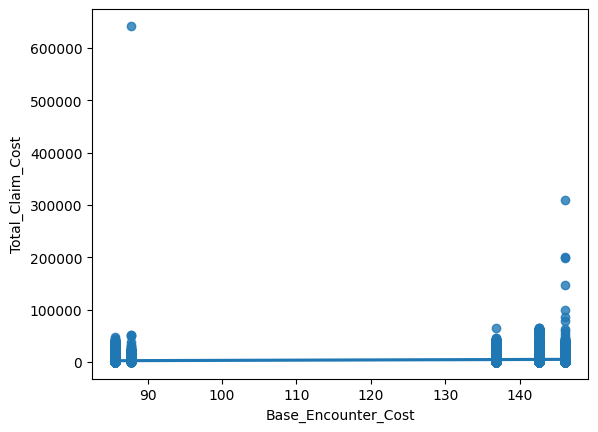

In [8]:
sns.regplot(data=df_costcorr,x='Base_Encounter_Cost',y='Total_Claim_Cost')

While a positive coefficient suggests some correlation, the lack of a steep regression line indicates that the relationship may not be practically significant.And the presence of the large number of outliers has most likely skewed the model.